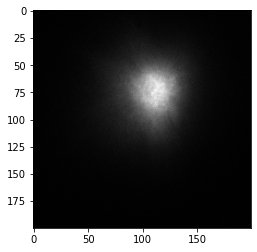

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from scipy import ndimage

data = np.array(fits.open('/Users/vlad/Downloads/Telegram Desktop/speckledata.fits')[2].data)
mean = np.mean(data, axis=0)
plt.imshow(mean, cmap='gray')

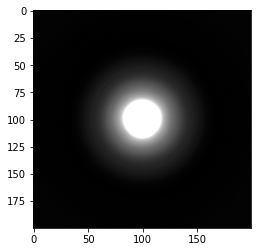

In [2]:
fourier = np.fft.fftshift(np.mean(np.abs(np.fft.fft2(data))**2, axis = 0))
mask = np.ones((fourier.shape[0], fourier.shape[0]), dtype = bool)
for i in range(fourier.shape[0]):
    for j in range(fourier.shape[0]):
        if (i-100)**2 + (j-100)**2 <= 50**2:
            mask[i, j] = 0

fourier -= np.sum(fourier[mask])/np.sum(mask)
N = 180
rotated = np.empty((N, fourier.shape[0], fourier.shape[0]))
for i in range(N):
    r = ndimage.rotate(fourier, i * 180 / N, reshape=False)
    rotated[i] =(r)
im = np.mean(rotated, axis=0)
plt.imshow(im, vmax = 5e8, cmap='gray')
im[mask] = 1
im = fourier/im
im[mask] = 0
obr = np.fft.fftshift(np.abs(np.fft.ifft2(im)))



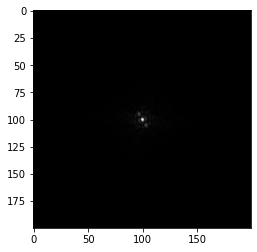

In [3]:
plt.imshow(obr, cmap='gray')